## Observations and Insights

- Due to the data having one outlier, we can either choose to include or exclude it as it won't skew the data one way or another too much. 

- In the line chart, there is evidence to show that mice being treated with the drug Capomullin is directly related to their tumor volume decreasing. 


- The data would be more accurate if we could get the age of the mice and also if the tumor volume were all caused from the same disease. 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_read = pd.read_csv(mouse_metadata)
study_results_read = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mouse_study_results = pd.merge(mouse_metadata_read, study_results_read, on="Mouse ID")
combined_mouse_study_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

mean = combined_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = combined_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Total Volume Variance": variance, "Tumor Volume Std. Dev.": stdev, 
                          "Tumor Volume Std. Err.": sem})
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Total Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

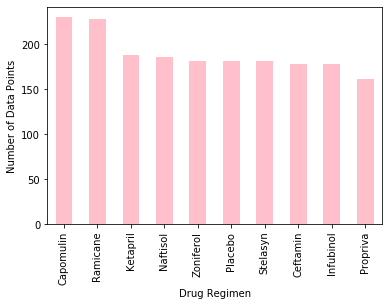

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_regimen = combined_mouse_study_results["Drug Regimen"].value_counts()
treatment_bar_graph = treatment_regimen.plot(kind="bar", facecolor="pink")

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')



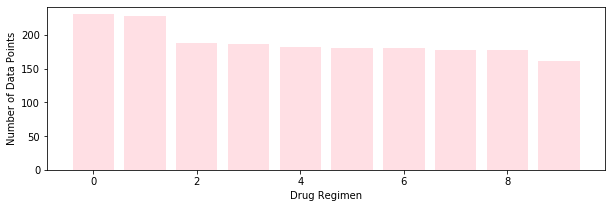

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
## do we need to do a group by to call it over? 
# use .index

x_axis = np.arange(len(summary_statistics_df.index))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis, treatment_regimen, color='pink', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()


## Pie plots

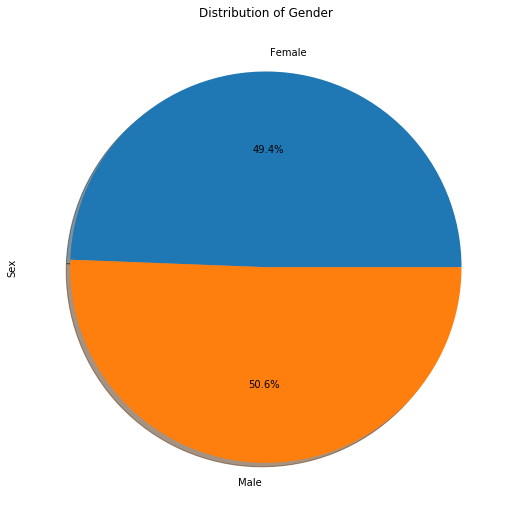

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice_group = combined_mouse_study_results.groupby('Sex')
gender_mice_count = gender_mice_group["Sex"].count()

gender_pie = gender_mice_count.plot(kind="pie", title=("Distribution of Gender"), figsize=(9, 9),autopct="%1.1f%%", shadow=True, startangle=0)

plt.show()


([<matplotlib.patches.Wedge at 0x2b34bb340c8>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Females'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Males')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

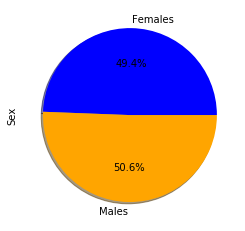

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice_count = gender_mice_group["Sex"].count()
labels = ["Females", "Males"]
colors = ["blue", "orange"]

plt.ylabel("Sex")
plt.pie(gender_mice_count, labels=labels, colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=0)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

timepoint_max = combined_mouse_study_results.groupby(['Mouse ID'])['Timepoint'].transform(max) == combined_mouse_study_results['Timepoint']
final_tumor_vol = combined_mouse_study_results[timepoint_max]
final_tumor_sort = final_tumor_vol.sort_values('Mouse ID')
final_tumor_sort

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

lowerq = final_tumor_sort.quantile(.25)

upperq = final_tumor_sort.quantile(.75)

iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: Age_months             6.000000
Weight (g)            25.000000
Timepoint             20.000000
Tumor Volume (mm3)    45.934712
Metastatic Sites       1.000000
Name: 0.25, dtype: float64
The upper quartile of temperatures is: Age_months            19.000000
Weight (g)            29.000000
Timepoint             45.000000
Tumor Volume (mm3)    64.957562
Metastatic Sites       3.000000
Name: 0.75, dtype: float64
The interquartile range of temperatures is: Age_months            13.00000
Weight (g)             4.00000
Timepoint             25.00000
Tumor Volume (mm3)    19.02285
Metastatic Sites       2.00000
dtype: float64
Values below Age_months           -13.500000
Weight (g)            19.000000
Timepoint            -17.500000
Tumor Volume (mm3)    17.400438
Metastatic Sites      -2.000000
dtype: float64 could be outliers.
Values above Age_months            38.500000
Weight (g)            35.000000
Timepoint             82.500000
Tumor Volume (mm3)

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# do a loc to create a dataframe for each one 

capomulin_data = final_tumor_sort.loc[(final_tumor_sort["Drug Regimen"] =="Capomulin")]
ramicane_data = final_tumor_sort.loc[(final_tumor_sort["Drug Regimen"] =="Ramicane")]
infubinol_data = final_tumor_sort.loc[(final_tumor_sort["Drug Regimen"] =="Infubinol")]
ceftamin_data = final_tumor_sort.loc[(final_tumor_sort["Drug Regimen"] =="Ceftamin")]



quartiles_capomulin = capomulin_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lower_capomulin = quartiles_capomulin[.25]
upper_capomulin = quartiles_capomulin[.75]
iqr_capomulin = upper_capomulin - lower_capomulin
lower_bound_capomulin = lower_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upper_capomulin + (1.5*iqr_capomulin)
outlier_occup_capomulin = capomulin_data.loc[(capomulin_data['Tumor Volume (mm3)'] < lower_bound_capomulin) | (capomulin_data['Tumor Volume (mm3)'] > upper_bound_capomulin)]

quartiles_ramicane = ramicane_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lower_ramicane = quartiles_ramicane[.25]
upper_ramicane = quartiles_ramicane[.75]
iqr_ramicane = upper_ramicane - lower_ramicane
lower_bound_ramicane = lower_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upper_ramicane + (1.5*iqr_ramicane)
outlier_occup_ramicane = ramicane_data.loc[(ramicane_data['Tumor Volume (mm3)'] < lower_bound_ramicane) | (ramicane_data['Tumor Volume (mm3)'] > upper_bound_ramicane)]

quartiles_infubinol = infubinol_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lower_infubinol = quartiles_infubinol[.25]
upper_infubinol = quartiles_infubinol[.75]
iqr_infubinol = upper_infubinol - lower_infubinol
lower_bound_infubinol = lower_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upper_infubinol + (1.5*iqr_infubinol)

outlier_occup_infubinol = infubinol_data.loc[(infubinol_data['Tumor Volume (mm3)'] < lower_bound_infubinol) | (infubinol_data['Tumor Volume (mm3)'] > upper_bound_infubinol)]
quartiles_ceftamin = ceftamin_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lower_ceftamin = quartiles_ceftamin[.25]
upper_ceftamin = quartiles_ceftamin[.75]
iqr_ceftamin = upper_ceftamin - lower_ceftamin
lower_bound_ceftamin = lower_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upper_ceftamin + (1.5*iqr_ceftamin)

outlier_occup_ceftamin = ceftamin_data.loc[(ceftamin_data['Tumor Volume (mm3)'] < lower_bound_ceftamin) | (ceftamin_data['Tumor Volume (mm3)'] > upper_bound_ceftamin)]
print(outlier_occup_capomulin)
print(outlier_occup_ramicane)
print(outlier_occup_infubinol)
print(outlier_occup_ceftamin)



Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


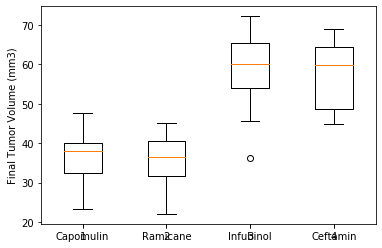

In [9]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot([capomulin_data["Tumor Volume (mm3)"], ramicane_data["Tumor Volume (mm3)"], infubinol_data["Tumor Volume (mm3)"], ceftamin_data["Tumor Volume (mm3)"]])
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

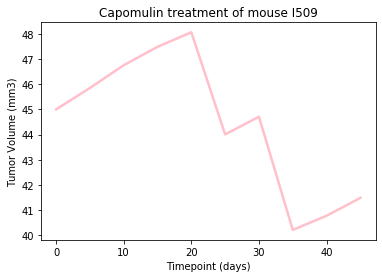

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
## groupby the timepoint, and then plotted the mean of the tumor volume where it's based on the timepoint

cap_mouse_df = combined_mouse_study_results.loc[(combined_mouse_study_results["Drug Regimen"] =="Capomulin")&(combined_mouse_study_results["Mouse ID"] =="l509")]
cap_groupby = cap_mouse_df.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()
plt.plot(cap_groupby, linewidth=2.5, color='pink')
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

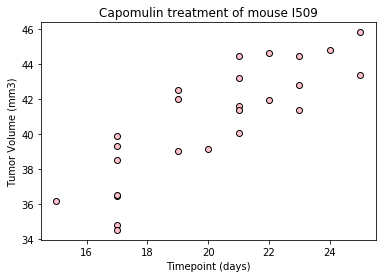

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_scatter_df = combined_mouse_study_results.loc[(combined_mouse_study_results["Drug Regimen"] =="Capomulin")]
cap_scatter_avg = cap_mouse_scatter_df.groupby(['Mouse ID']).mean()
cap_scatter_avg
plt.scatter(cap_scatter_avg['Weight (g)'], cap_scatter_avg['Tumor Volume (mm3)'], facecolors="pink", edgecolors="black")
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

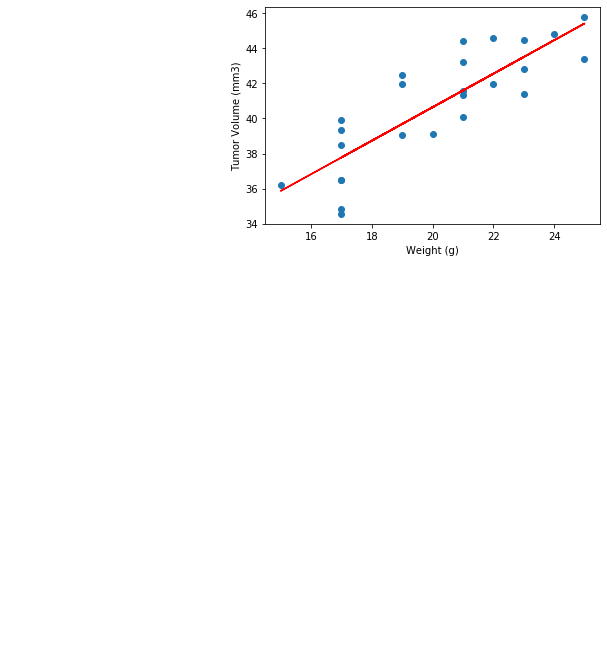

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_scatter_avg['Weight (g)']
y_values = cap_scatter_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



In [ ]:
# before submitting, add labels to the panda plot and do the analysis